In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [20]:
# Install git (if not already installed)
!apt-get install git

# Configure Git with your username and email
!git config --global user.name "davekindea"
!git config --global user.email "davekindea1993@gmail.com"

# Clone your GitHub repo (if needed)
!git clone https://github.com/davekindea/HousePricePredction.git

# Navigate to the repo folder
%cd //HousePricePredction

# Stage and commit changes
!git add .
!git commit -m "projuct start"

# Push changes to GitHub (using personal access token if needed)
!git push origin main


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Cloning into 'HousePricePredction'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 6 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 23.68 KiB | 2.96 MiB/s, done.
[Errno 2] No such file or directory: '//HousePricePredction'
/content
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [16]:

data = pd.read_csv("/content/real_estate_dataset.csv")


In [17]:
data.head()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


In [18]:
data.shape

(500, 12)

In [19]:
data.isnull().sum()

,0
ID,0
Square_Feet,0
Num_Bedrooms,0
Num_Bathrooms,0
Num_Floors,0
Year_Built,0
Has_Garden,0
Has_Pool,0
Garage_Size,0
Location_Score,0


In [21]:
data.describe()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,174.640428,2.958000,1.976000,1.964000,1957.604000,0.536000,0.492000,30.174000,5.164410,10.469641,582209.629529
std,144.481833,74.672102,1.440968,0.820225,0.802491,35.491781,0.499202,0.500437,11.582575,2.853489,5.588197,122273.390345
min,1.000000,51.265396,1.000000,1.000000,1.000000,1900.000000,0.000000,0.000000,10.000000,0.004428,0.062818,276892.470136
25%,125.750000,110.319923,2.000000,1.000000,1.000000,1926.000000,0.000000,0.000000,20.000000,2.760650,6.066754,503080.344140
50%,250.500000,178.290937,3.000000,2.000000,2.000000,1959.000000,1.000000,0.000000,30.000000,5.206518,10.886066,574724.113347
75%,375.250000,239.031220,4.000000,3.000000,3.000000,1988.000000,1.000000,1.000000,41.000000,7.732933,15.072590,665942.301274
max,500.000000,298.241199,5.000000,3.000000,3.000000,2022.000000,1.000000,1.000000,49.000000,9.995439,19.927966,960678.274291


In [22]:
correlation=data.corr()

<Axes: >

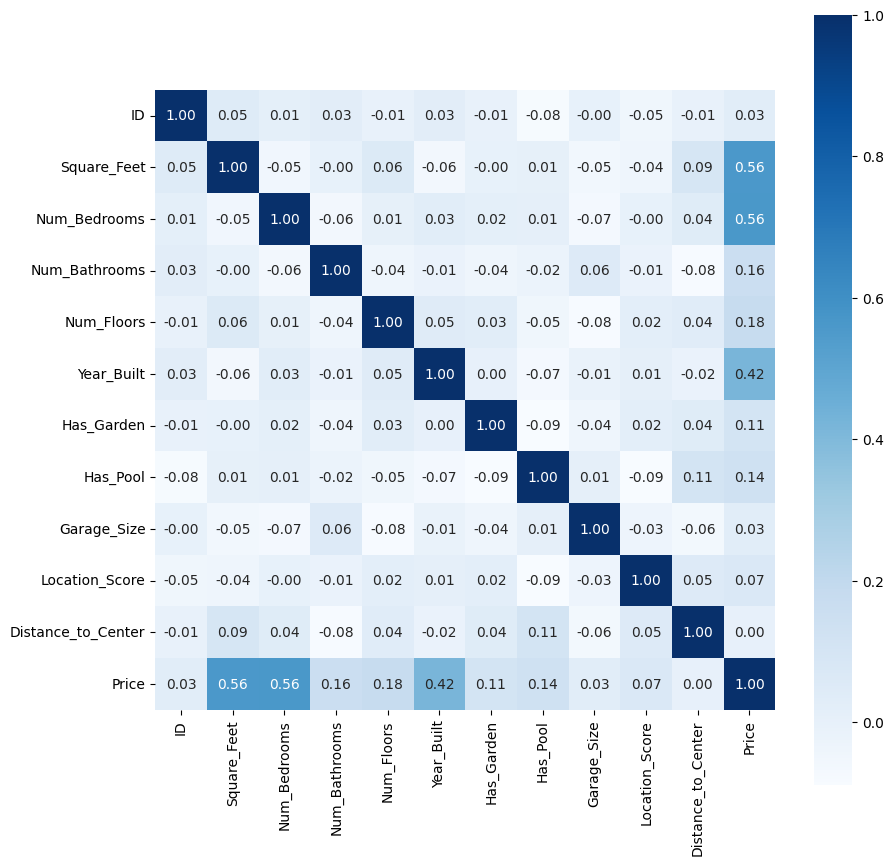

In [30]:
plt.figure(figsize=(10.,10))
sns.heatmap(correlation,cbar=True,square=True, fmt=".2f",annot=True,annot_kws={"size": 10},cmap="Blues")

In [33]:
X = data.drop("Price", axis=1)
Y = data["Price"]


In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [36]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(400, 11) (100, 11) (400,) (100,)


In [39]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [40]:
price_predction=model.predict(X_test)
print(price_predction)

[822293.51574093 735326.94995265 616862.93438521 519427.66304187
 416008.62829054 444198.84900356 583869.84564384 522384.95273506
 631369.56441365 704731.91810239 627322.3220031  503610.79727734
 571650.8777106  526524.07417287 425649.43229526 745507.39707173
 538425.07729297 534769.5310998  603167.12428676 720664.46739916
 488681.86482422 554735.03461548 672530.64074021 363435.47763533
 632952.23994921 341701.56769222 571198.44723108 607630.87701223
 396518.58430596 842324.78852972 410048.93860694 623471.63840054
 532289.20767863 537176.06100353 578071.45551508 500059.98476336
 637456.41051173 408289.92044089 371590.92017418 673708.34756152
 717703.32636706 400428.50889561 788140.36419741 450492.85042315
 597527.74893117 454059.80577948 630782.34087532 592942.08221625
 544190.89532939 706587.51058337 415771.1128687  347685.18909551
 600375.68142228 677371.12802692 588556.35904031 331107.1187038
 593885.07048928 669862.28045152 639373.42346861 529835.61332617
 725094.05562421 406979.97

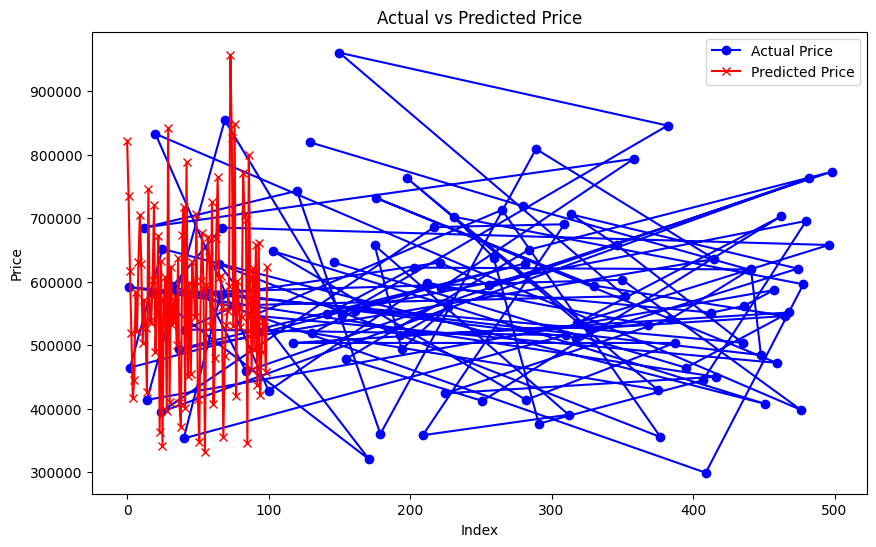

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual Price", color="blue", marker="o")
plt.plot(price_predction, label="Predicted Price", color="red", marker="x")
plt.xlabel("Index")
plt.ylabel("Price")
plt.title("Actual vs Predicted Price")
plt.legend()
plt.show()

In [48]:
import sklearn.metrics as matrix
score=matrix.mean_squared_error(y_test,price_predction)
print("MSE : ",score)
score_1=matrix.r2_score(y_test,price_predction)
print("R squared error : ",score_1)

MSE :  343175173.8973956
R squared error :  0.9799541390221179


<ipython-input-50-1798360b5204>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diff)


<Axes: xlabel='Price', ylabel='Density'>

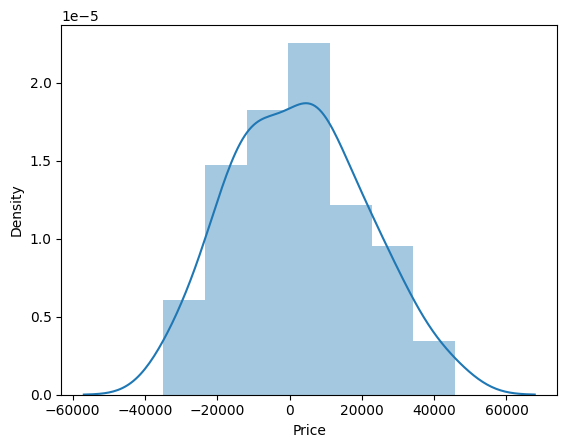

In [50]:
diff=y_test-price_predction
sns.distplot(diff)

In [54]:
import pickle
pickle.dump(model,open("model.pkl","wb"))